## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Find Reference Image for Atlas-based Segmentation of MR Knee Images](https://sbonaretti.github.io/pyKNEEr/segmentation.html)
Content under Creative Commons Attribution license CC-BY-NC 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

The reference image is found in an iterative way, as the image whose vector field is the closest to the average of the vector fields at that iteration. Iterations stop at convergence or at a defined iteration number.

The image used to initialize the first iteration was determined using a random function, which was initialized with an arbitrarily chosen seed number for reproducibility ([here](https://github.com/sbonaretti/pyKNEEr/blob/master/code/pykneer/find_reference_random_gen.py)) 

---

*Automatic data download for the reproducibility of this notebook:*
- Download input images from Zenodo and image file list from GitHub:

In [ ]:
import os
import wget
from zipfile import ZipFile 

In [ ]:
# local folder  
local_folder_name  = "./OAI1/"
# Zenodo variables
input_URL          = "https://zenodo.org/record/2583184/files/"
zipped_folder_name = "OAI1_findingReference.zip" 
# GitHub variables
raw_url            = "https://raw.githubusercontent.com/sbonaretti/pyKNEEr/master/publication/data/"
input_file_name    = "image_list_find_reference_04.txt"

In [ ]:
# create local folder for dataset
if not os.path.isdir(local_folder_name):
    os.mkdir(local_folder_name)
    print ("folder " + local_folder_name + " created")

In [ ]:
# download zipped folder from Zenodo
wget.download(input_URL + zipped_folder_name, local_folder_name + zipped_folder_name) 

In [ ]:
# unzip folder
with ZipFile(local_folder_name + zipped_folder_name, 'r') as zip: 
    zip.extractall(local_folder_name) 

In [ ]:
# download input file from GitHub
wget.download(raw_url + input_file_name, "./" + input_file_name)

---

## Import packages

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from pykneer import pykneer_io            as io
from pykneer import find_reference_for_nb as find

## Image information

Inputs:   
- `input_file_name` contains the list of the preprocessed images of the dataset
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)

In [3]:
# input_file_name = "./image_list_find_reference_04.txt" # commented out because downloaded from GitHub
n_of_cores      = 10

#### Read image data
- `image_data` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_find_reference(input_file_name)

-> image information loaded


## Find reference
Run the convergence study to find the reference as the image whose vector field is the closest to the average of the vector fields at that iteration

In [5]:
reference_names, min_distances = find.find_reference(image_data, n_of_cores)

-> Iteration: 1
   1. Preparing reference YR04_04_DESS_prep.mha
   2. Registering images to current reference
-> Vector fields calculated
   3. Computing new reference
    YR04_01_DESS_prep_VF.mha
      norm before normalization: 2569.8655
      norm after normalization: 0.0006701640836657925
      number of image voxels: 23592960
      snumber of masked voxels: 3834681
    YR04_02_DESS_prep_VF.mha
      norm before normalization: 3792.6575
      norm after normalization: 0.0009890411929188178
      number of image voxels: 23592960
      snumber of masked voxels: 3834681
    YR04_03_DESS_prep_VF.mha
      norm before normalization: 3192.7148
      norm after normalization: 0.0008325894236704435
      number of image voxels: 23592960
      snumber of masked voxels: 3834681
    YR04_04_DESS_prep_VF.mha
      norm before normalization: 3936.3945
      norm after normalization: 0.0010265246395332493
      number of image voxels: 23592960
      snumber of masked voxels: 3834681
    YR04_05_

## Show results
The graph shows the images whose distance to the average vector field is the minimum, at each iteration. The image at the current iteration is used as the reference image for the following iteration.

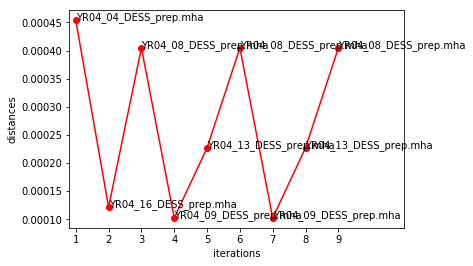

In [6]:
find.plot_convergence(reference_names, min_distances)

### Dependencies

In [7]:
%load_ext watermark
%watermark -v -m -p SimpleITK,numpy,matplotlib,multiprocessing

CPython 3.6.1
IPython 6.4.0

SimpleITK unknown
numpy 1.14.5
matplotlib 2.2.2
multiprocessing unknown

compiler   : GCC 4.8.5 20150623 (Red Hat 4.8.5-11)
system     : Linux
release    : 3.10.0-957.1.3.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 20
interpreter: 64bit
